<h1>Полученное задание</h1>

**ДЗ-2. ЗАДАЧА 1.**

Найти точную нижнюю грань значений функции f(x ,y) на подмножестве X плоскости, заданном системой неравенств (C).

Нарисовать на координатной плоскости множество X, линии уровня функции f, отметить точки множества X, на которых достигается точная нижняя грань, если такие есть. Найти координат одной из таких точек, и точную нижнюю грань значений f на X.

Выписать соответствующую каноническую задачу линейного программирования

**Вариант 21. Якимова Т. С.**

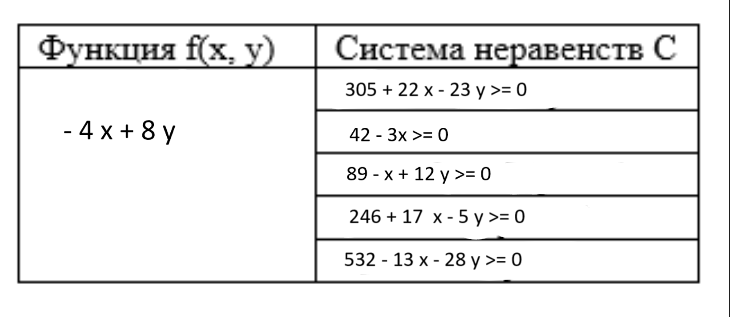

Второе неравенство изначально выгладело так:
210 - 15 x >= 0

Я сразу сократила это неравенство. Стало: 

42 - 3x >= 0


<h1>Ход работы</h1>

Неравенство -3x + 42 >= 0 средует переписать по-другому:
х <= 14
Оно отличается от других неравенств тем, что не дает решений относительно y . Придется компенсировать это в программе

In [24]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

n = (-4, 8)

c_as_coefs = [(+22, -23, +305), (-3, 0, +42), (-1, +12, +89), (+17, -5, 246), (-13, -28, +532)]

class Line:
  is_calculated = False
  x_range = np.array([])
  y_range = np.array([])

  def __init__(self, x, y, b):
    self.x = x
    self.y = y
    self.b = b

  def as_tuple(self):
    return (self.x, self.y, self.b)

  def __str__(self):
    return ((('-' if self.x < 0 else '') + str(abs(self.x)) + 'x') if self.x != 0 else '') + \
           ((' ' + ('-' if self.y < 0 else '+') + ' ' + str(abs(self.y)) + 'y') if self.y != 0 else '') + \
           ((' ' + ('-' if self.b < 0 else '+') + ' ' + str(abs(self.b))) if self.b != 0 else '') + " = 0"

  def calculate(self, x_range):
    self.is_calculated = False

    if self.y != 0:
      self.y_range = np.array(list([-(self.b + self.x * x) / self.y for x in x_range]))
      self.x_range = x_range
    else:
      self.x_range = np.array([-self.b/self.x])
      self.y_range = np.array([np.inf])
    self.is_calculated = True

  def get_points(self):
    if not self.is_calculated:
      print('Warning! you haven\'t calculated', str(self), 'yet')
    return (self.x_range, self.y_range)

## Поиск пересечений

In [25]:
intersections = list()

for i, p1 in enumerate(c_as_coefs[:-1]):
  for j, p2 in enumerate(c_as_coefs[i+1:]):
    x1, y1, b1 = p1
    x2, y2, b2 = p2
    coef_mtx = np.array([[x1,y1], [x2,y2]])
    b_mtx = np.array([-b1, -b2])
    intersections.append(np.linalg.solve(coef_mtx, b_mtx))
intersections = np.array(intersections)
print(intersections)

[[ 14.          26.65217391]
 [-23.68049793  -9.39004149]
 [-14.70818505  -0.80782918]
 [  4.03934426  17.12459016]
 [ 14.          -6.25      ]
 [ 14.          96.8       ]
 [ 14.          12.5       ]
 [-17.07035176  -8.83919598]
 [ 48.23913043  -3.39673913]
 [ -7.81515712  22.6284658 ]]


In [26]:
def get_plot_size(points, offset = 1, squared=False):
  offset = abs(offset)
  width_l =  min(points[:, 0]) - offset
  width_r =  max(points[:, 0]) + offset
  height_l = min(points[:, 1]) - offset
  height_h = max(points[:, 1]) + offset
  if not squared:
    return [width_l, width_r, height_l, height_h]
  else:
    return [
      min(width_l, height_l), max(width_r, height_h),
      min(width_l, height_l), max(width_r, height_h)
    ]

In [27]:
x_range = np.array([get_plot_size(intersections)[0], get_plot_size(intersections)[1]])
lines = [Line(x, y, b) for x, y, b in c_as_coefs]
for line in lines:
  line.calculate(x_range)
  print(str(line), line.get_points()[0].shape, line.get_points()[1].shape)

22x - 23y + 305 = 0 (2,) (2,)
-3x + 42 = 0 (1,) (1,)
-1x + 12y + 89 = 0 (2,) (2,)
17x - 5y + 246 = 0 (2,) (2,)
-13x - 28y + 532 = 0 (2,) (2,)


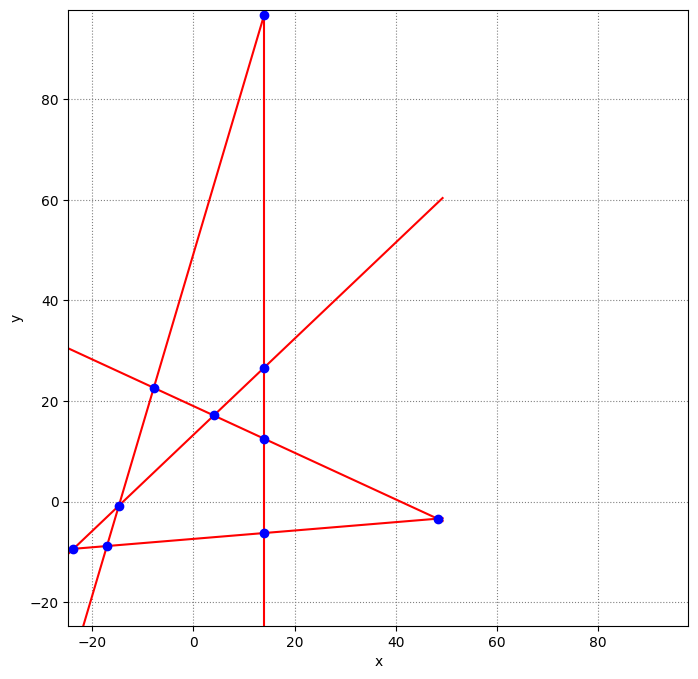

In [28]:
fig, ax = plt.subplots()

plt.axis(get_plot_size(intersections, squared=True))
plt.title('')
plt.xlabel('x')
plt.ylabel('y')

for line in lines:
  x, y = line.get_points()
  if y[0] == np.inf:
    plt.axvline(x=x, color='r')
  else:
    plt.plot(x, y, 'r')

for x, y in intersections:
  plt.plot(x, y, 'bo')

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))

ax.grid(which='major', color = 'gray', linestyle = ':')

fig.set_figheight(8)
fig.set_figwidth(8)

plt.show()

## Поиск угловых точек

Выделю угловые точки. Область решений является областью плоскости, на которой выполняются все неравенства множесства ограничений С.

Можно перебрать все пересечения и выделить из них те, которые удовлетворяют всем неравенствам вида xX + yY + b >= 0. Имеено в таком формате они и записаны в программе.

К сожалению, из-за погрешностей представления дробей, любая точка, лежащая на пересечении 2-х прямых не всегда удовлетворяет даже тем двум ограничениям, выраженными этими прямыми, не то что всем остальным. Поэтому код ниже не дает результатов, либо выделяет только 2 точки из 5.

Придется выбирать угловые точки на этапе поиска пересечений, потому что тогда для каждой точки пересечения нам известны уравнения самих пересекающихся прямых. А для этого нужно пересчитать все заново:

In [29]:
intersections = list()
corner_points = list()

for i, l1 in enumerate(lines[:-1]):
  for j, l2 in enumerate(lines[i+1:]):
    x1, y1, b1 = l1.as_tuple()
    x2, y2, b2 = l2.as_tuple()
    coef_mtx = np.array([[x1,y1], [x2,y2]])
    b_mtx = np.array([-b1, -b2])

    cross = np.linalg.solve(coef_mtx, b_mtx)
    px, py = cross
    intersections.append(cross)
    
    print('{', l1, '} x {', l2, '} =>', '(%2.2f, %2.2f)' % (tuple(cross)))

    # все ограничения на данную точку пересечения, которые нужно учитывать - это все уравнения прямых, кроме прямых, образующих эту точку пересечения,  
    not_this_eq = map(
      lambda x: x[1].as_tuple(),
      filter(
        lambda pair: pair[0] != i and pair[0] != i+j+1,
        enumerate(lines)
      )
    )
    is_corner = True
    for x,y,b in not_this_eq:
      if x*px + y*py + b < 0:
        print('Не является угловой:  ', x,'*', px, '+', y,'*',py, '+', b, '=', x*px + y*py + b, '< 0')
        is_corner = False
        break
    if is_corner:
      corner_points.append((px,py))
      print('НАЙДЕНА угловая:  ', corner_points[-1])
    print()


{ 22x - 23y + 305 = 0 } x { -3x + 42 = 0 } => (14.00, 26.65)
Не является угловой:   -13 * 14.0 + -28 * 26.65217391304348 + 532 = -396.2608695652175 < 0

{ 22x - 23y + 305 = 0 } x { -1x + 12y + 89 = 0 } => (-23.68, -9.39)
Не является угловой:   17 * -23.680497925311204 + -5 * -9.390041493775932 + 246 = -109.6182572614108 < 0

{ 22x - 23y + 305 = 0 } x { 17x - 5y + 246 = 0 } => (-14.71, -0.81)
НАЙДЕНА угловая:   (np.float64(-14.708185053380783), np.float64(-0.8078291814946614))

{ 22x - 23y + 305 = 0 } x { -13x - 28y + 532 = 0 } => (4.04, 17.12)
НАЙДЕНА угловая:   (np.float64(4.039344262295081), np.float64(17.124590163934425))

{ -3x + 42 = 0 } x { -1x + 12y + 89 = 0 } => (14.00, -6.25)
НАЙДЕНА угловая:   (np.float64(14.0), np.float64(-6.25))

{ -3x + 42 = 0 } x { 17x - 5y + 246 = 0 } => (14.00, 96.80)
Не является угловой:   22 * 14.0 + -23 * 96.8 + 305 = -1613.4 < 0

{ -3x + 42 = 0 } x { -13x - 28y + 532 = 0 } => (14.00, 12.50)
НАЙДЕНА угловая:   (np.float64(14.0), np.float64(12.5))

{ 

## Поиск минимальной угловой точки

Поиск той угловой точки, в которой значение функции будет минимальным

In [30]:
min_corner = min(corner_points, key=lambda p: n[0] * p[0] + n[1] * p[1])
print('Значение функции минимально в этой точке:', min_corner)
min_value = n[0] * min_corner[0] + n[1] * min_corner[1]
print('Минимальное значение функции f(x, y) = -4x + 8y:', min_value)

Значение функции минимально в этой точке: (np.float64(14.0), np.float64(-6.25))
Минимальное значение функции f(x, y) = -4x + 8y: -106.0


## Построение линии уровня, проходящей через минимальную угловую точку

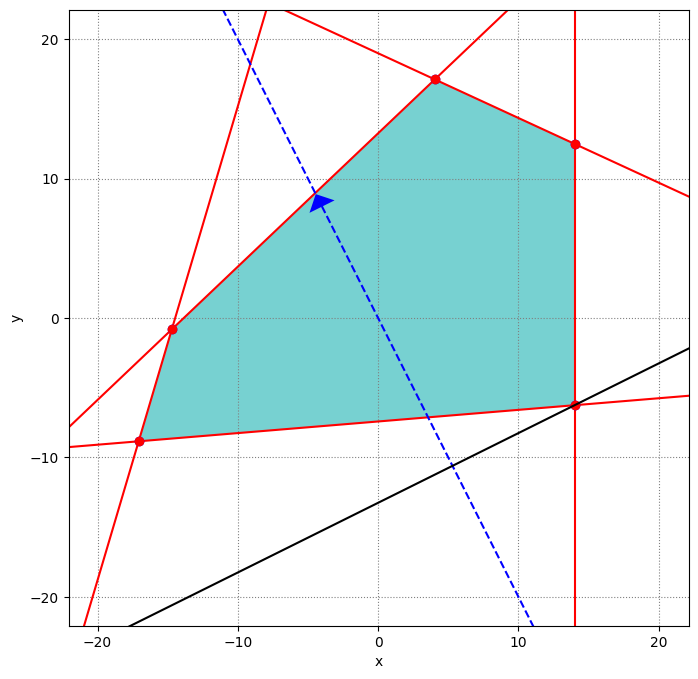

In [31]:
sizes = get_plot_size(np.append(corner_points, np.array(n).reshape(1,2), axis=0), offset=5, squared=True)
corner_points = np.array(sorted(corner_points))

fig, ax = plt.subplots()

plt.axis(sizes)
plt.title('')
plt.xlabel('x')
plt.ylabel('y')

for line in lines:
  x, y = line.get_points()
  if y[0] == np.inf:
    plt.axvline(x=x, color='r')
  else:
    plt.plot(x, y, 'r')

for x, y in intersections:
  plt.plot(x, y, 'bo')

for x, y in corner_points:
  plt.plot(x, y, 'ro')

# Сортировка угловых точек по полярному углу
def sort_by_angle(points):
    center = points.mean(axis=0)
    angles = np.arctan2(points[:, 1] - center[1], points[:, 0] - center[0])
    return points[np.argsort(angles)]

corner_points = sort_by_angle(corner_points)
plt.fill(corner_points[:,0], corner_points[:,1], '#00aaaa88')


x_module_l = np.array([sizes[0], sizes[1]])
plt.plot(x_module_l, n[1]/n[0] * x_module_l, 'b--')
plt.arrow(0,0,n[0],n[1],head_width=2,head_length=1,zorder=3, color='blue', linestyle='')

def module(eq, p):
  x, y, b = eq
  px, py = p
  return (-y, x, +y*px-x*py, 0)

m = module((-n[1]/n[0], 1, 0), min_corner)
plt.plot(x_module_l, -(m[2] + m[0] * x_module_l) / m[1], 'black')

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

ax.grid(which='major', color = 'gray', linestyle = ':')

fig.set_figheight(8)
fig.set_figwidth(8)

plt.show()

## Переход к канонической форме ЗЛП.
<!-- (\d\d?)x([+-])(\d\d?)y≥ -->
<!-- (\d*)(u\d)([+-≥]) -->
**Исходный вид:**

F(X) = -4x + 8y → min при ограничениях:

+ 22x - 23y ≥ -305
+ -x ≥ -14
+ -x + 12y ≥ -89
+ 17x - 5y ≥ -246
+ -13x - 28y ≥ -532

Так как переменные x, y произвольного знака, то они заменяются разностями неотрицательных переменных: x = u0 - u1 , y = u2 - u3

+ 22(u0 - u1) - 23(u2 - u3) ≥ -305
+ -(u0 - u1) ≥ -14
+ -(u0 - u1) + 12(u2 - u3) ≥ -89
+ 17(u0 - u1) - 5(u2 - u3) ≥ -246
+ -13(u0 - u1) - 28(u2 - u3) ≥ -532
+ u0 > 0, u1 > 0, u2 > 0, u3 > 0

Соответствующая целевая функция примет вид:

F(X) = -4(u0 - u1) + 8(u2 - u3)

или

F(X) = -4u0 + 4u1 + 8u2 - 8u3 → min при ограничениях:

+ 22u0 - 22u1 - 23u2 + 23u3 ≥ -305
+ -u0 + u1 ≥ -14
+ -u0 + u1 + 12u2 - 12u3 ≥ -89
+ 17u0 - 17u1 - 5u2 + 5u3 ≥ -246
+ -13u0 + 13u1 - 28u2 + 28u3 ≥ -532
+ u0 > 0, u1 > 0, u2 > 0, u3 > 0

**Замена нерваенств равенствами**

заменяю неравенства вида f*(u0, u1, u2, u3) >= n системой [ f(u0, u1, u2, u3) - u* = n,  u* > 0 ]

+ 22u0 - 22u1 - 23u2 + 23u3 = -305
+ -u0 + u1 = -14
+ -u0 + u1 + 12u2 - 12u3 = -89
+ 17u0 - 17u1 - 5u2 + 5u3 = -246
+ -13u0 + 13u1 - 28u2 + 28u3 = -532
+ ui > 0, i c [0, 3]

**Итоговый канонический вид задачи:**

F(X) = -4u0 + 4u1 + 8u2 - 8u3 → min при ограничениях:
+ 22u0 - 22u1 - 23u2 + 23u3 = -305
+ -u0 + u1 = -14
+ -u0 + u1 + 12u2 - 12u3 = -89
+ 17u0 - 17u1 - 5u2 + 5u3 = -246
+ -13u0 + 13u1 - 28u2 + 28u3 = -532
+ ui > 0, i c [0, 3]